## Import dependencies

In [1]:
# Import visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Import data preprocessing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
from sklearn import preprocessing
from sklearn.compose import make_column_transformer
from sklearn.model_selection import train_test_split
import math

# Import data train model libraries
from sklearn.ensemble import RandomForestClassifier

# Import model evaluation libraries
import itertools
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import f1_score
from sklearn.metrics import jaccard_score

In [2]:
df_train = pd.read_csv(f'train.csv')
df_test = pd.read_csv(f'test.csv')

In [3]:
dfc_train = df_train.copy()
dfc_test = df_test.copy()

In [4]:
# # Handling outliers from Fare column

# # Finding quartiles
# Q1 = np.percentile(dfc_train['Fare'], 25)
# Q3 = np.percentile(dfc_train['Fare'], 75)

# outlier_low = Q1 - 1.5 * (Q3 - Q1)
# outlier_high = Q3 + 1.5 * (Q3 - Q1)

# dfc_train = dfc_train[(dfc_train['Fare']> outlier_low) & (dfc_train['Fare']<outlier_high)]
# dfc_train = dfc_train.reset_index(drop=True)
train_row_cnt = dfc_train.shape[0]

In [5]:
y = dfc_train.Survived
dfc_train.drop(['Survived'], axis = 1, inplace = True) # Dropping extra column

In [6]:
dfc_train.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [7]:
dfm = pd.concat([dfc_train, dfc_test], ignore_index=True)

In [8]:
dfm

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...
1304,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,NaN,S
1305,1306,1,"Oliva y Ocana, Dona. Fermina",female,39.0,0,0,PC 17758,108.9000,C105,C
1306,1307,3,"Saether, Mr. Simon Sivertsen",male,38.5,0,0,SOTON/O.Q. 3101262,7.2500,NaN,S
1307,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,NaN,S


In [9]:
dfm.isnull().sum()

PassengerId       0
Pclass            0
Name              0
Sex               0
Age             263
SibSp             0
Parch             0
Ticket            0
Fare              1
Cabin          1014
Embarked          2
dtype: int64

In [10]:
#drop cabin column
dfm.drop('Cabin', axis=1, inplace=True)

In [11]:
#drop ticket column
dfm.drop('Ticket', axis=1, inplace=True)

In [12]:
#Filling missing value in Embarked column with previous value 
dfm['Embarked'].fillna(method='bfill',inplace=True)

In [13]:
#Filling missing value in Age column with mode value
dfm['Age'].fillna((dfm['Age'].mode()[0]), inplace = True)

In [14]:
#Filling missing value in Fare column with previous value 
dfm['Fare'].fillna(method='bfill',inplace=True)

In [15]:
print(list(np.arange(0,10, 1)/10))

[0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]


In [16]:
# Divided ages to age categories baby, child, teenager, young adult, adult and senior
dfm['LifeStage'] = 0

for i in dfm['Age'].index:
    if dfm['Age'].loc[i] in list(np.arange(0,100, 1)/100):
        dfm['LifeStage'].loc[i]= 'Baby'
        
    if dfm['Age'].loc[i] in list(np.arange(10,101, 1)/10):
        dfm['LifeStage'].loc[i]= 'Child'
        
    if dfm['Age'].loc[i] in list(np.arange(101,201, 1)/10):
        dfm['LifeStage'].loc[i]= 'Teenager'
        
    if dfm['Age'].loc[i] in list(np.arange(201,351, 1)/10):
        dfm['LifeStage'].loc[i]= 'Young Adult'
        
    if dfm['Age'].loc[i] in list(np.arange(351,651, 1)/10):
        dfm['LifeStage'].loc[i]= 'Adult'
    
    if dfm['Age'].loc[i] in list(np.arange(651,1201, 1)/10):
        dfm['LifeStage'].loc[i]= 'Senior'

C:\Users\rdede\anaconda3\lib\site-packages\pandas\core\indexing.py:1732: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_single_block(indexer, value, name)


In [17]:
titan_df = dfm.copy()
titan_train = pd.concat([titan_df.sort_index().iloc[:(train_row_cnt)], y], axis = 1)
titan_test = pd.concat([titan_df.sort_index().iloc[(train_row_cnt):]], axis = 1)

In [18]:
# Check split point of train set
titan_train.tail()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,LifeStage,Survived
886,887,2,"Montvila, Rev. Juozas",male,27.0,0,0,13.00,S,Young Adult,0
887,888,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,30.00,S,Teenager,1
888,889,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,24.0,1,2,23.45,S,Young Adult,0
889,890,1,"Behr, Mr. Karl Howell",male,26.0,0,0,30.00,C,Young Adult,1
890,891,3,"Dooley, Mr. Patrick",male,32.0,0,0,7.75,Q,Young Adult,0


In [19]:
titan_train[titan_train['Age']<1]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,LifeStage,Survived
78,79,2,"Caldwell, Master. Alden Gates",male,0.83,0,2,29.0000,S,Baby,1
305,306,1,"Allison, Master. Hudson Trevor",male,0.92,1,2,151.5500,S,Baby,1
469,470,3,"Baclini, Miss. Helene Barbara",female,0.75,2,1,19.2583,C,Baby,1
644,645,3,"Baclini, Miss. Eugenie",female,0.75,2,1,19.2583,C,Baby,1
755,756,2,"Hamalainen, Master. Viljo",male,0.67,1,1,14.5000,S,Baby,1
803,804,3,"Thomas, Master. Assad Alexander",male,0.42,0,1,8.5167,C,Baby,1
831,832,2,"Richards, Master. George Sibley",male,0.83,1,1,18.7500,S,Baby,1


In [20]:
# Check split point of test set
titan_test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Fare,Embarked,LifeStage
891,892,3,"Kelly, Mr. James",male,34.5,0,0,7.8292,Q,Young Adult
892,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,7.0000,S,Adult
893,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,9.6875,Q,Adult
894,895,3,"Wirz, Mr. Albert",male,27.0,0,0,8.6625,S,Young Adult
895,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,12.2875,S,Young Adult


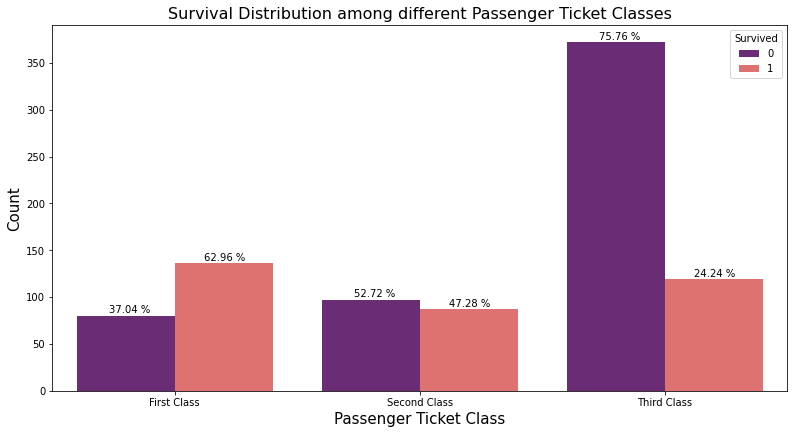

In [21]:
# Creating onject containing Ticket distribution
feature_pc = titan_train.groupby(by = 'Pclass')['Survived'].value_counts()

# Declaring figure size
plt.figure(figsize = (10, 5))

# Declaring color parameters
sns.countplot(data = titan_train, x = 'Pclass',  hue = 'Survived', palette = 'magma')

# Customised percentage labels for each instance

plt.text(x = -0.27, y = feature_pc[1][0] + 3, s = "{} %".format(((feature_pc[1][0]/feature_pc[1].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12, y = feature_pc[1][1] + 3, s = "{} %".format(((feature_pc[1][1]/feature_pc[1].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 1, y = feature_pc[2][0] + 3, s = "{} %".format(((feature_pc[2][0]/feature_pc[2].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 1, y = feature_pc[2][1] + 3, s = "{} %".format(((feature_pc[2][1]/feature_pc[2].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 2, y = feature_pc[3][0] + 3, s = "{} %".format(((feature_pc[3][0]/feature_pc[3].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 2, y = feature_pc[3][1] + 3, s = "{} %".format(((feature_pc[3][1]/feature_pc[3].sum())*100).round(2)), fontsize = 10)

# Plot title:
plt.title('Survival Distribution among different Passenger Ticket Classes', fontsize = 16)

# Label Editing

plt.xticks([0, 1, 2], ['First Class', 'Second Class', 'Third Class'], fontsize = 10)
plt.xlabel('Passenger Ticket Class', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# Padding
plt.tight_layout(pad = -3)

# Show graph
plt.show()

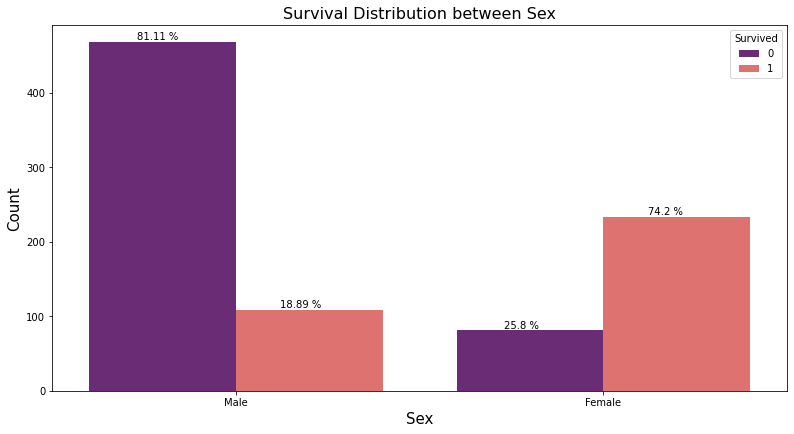

In [22]:
# Relationship between Survival and Sex 

# Creating onject containing Sex distribution
feature_sex = titan_train.groupby(by = 'Sex')['Survived'].value_counts()

# Declaring figure size
plt.figure(figsize = (10, 5))

# Declaring color parameters
sns.countplot(data = titan_train, x = 'Sex',  hue = 'Survived', palette = 'magma')

# Customised percentage labels for each instance

plt.text(x = -0.27, y = feature_sex['male'][0] + 3, s = "{} %".format(((feature_sex['male'][0]/feature_sex['male'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12, y = feature_sex['male'][1] + 3, s = "{} %".format(((feature_sex['male'][1]/feature_sex['male'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 1, y = feature_sex['female'][0] + 3, s = "{} %".format(((feature_sex['female'][0]/feature_sex['female'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 1, y = feature_sex['female'][1] + 3, s = "{} %".format(((feature_sex['female'][1]/feature_sex['female'].sum())*100).round(2)), fontsize = 10)

# Plot title:
plt.title('Survival Distribution between Sex', fontsize = 16)

# Label Editing

plt.xticks([0, 1], ['Male', 'Female'], fontsize = 10)
plt.xlabel('Sex', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# Padding
plt.tight_layout(pad = -3)

# Show graph
plt.show()

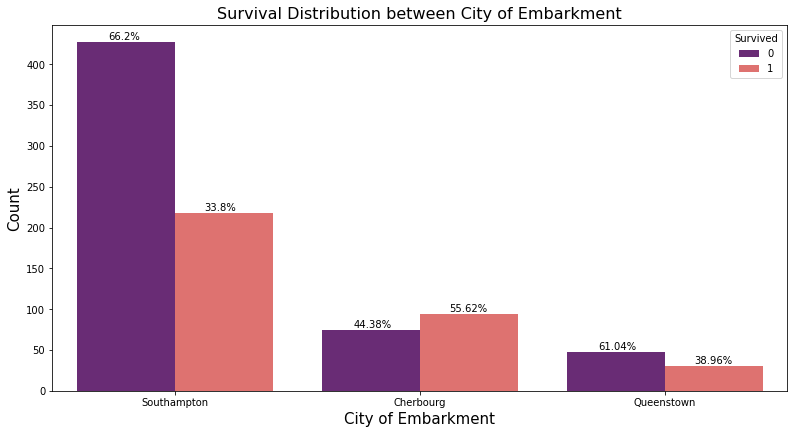

In [23]:
# Relationship between Survival and Embarked 

# Creating onject containing Embarked distribution
feature_embarked = titan_train.groupby(by = 'Embarked')['Survived'].value_counts()

# Declaring figure size
plt.figure(figsize = (10, 5))

# Declaring color parameters
sns.countplot(data = titan_train, x = 'Embarked',  hue = 'Survived', palette = 'magma')

# Customised percentage labels for each instance

plt.text(x = -0.27, y = feature_embarked['S'][0] + 3, s = "{}%".format(((feature_embarked['S'][0]/feature_embarked['S'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12, y = feature_embarked['S'][1] + 3, s = "{}%".format(((feature_embarked['S'][1]/feature_embarked['S'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 1, y = feature_embarked['C'][0] + 3, s = "{}%".format(((feature_embarked['C'][0]/feature_embarked['C'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 1, y = feature_embarked['C'][1] + 3, s = "{}%".format(((feature_embarked['C'][1]/feature_embarked['C'].sum())*100).round(2)), fontsize = 10)
plt.text(x = -0.27 + 2, y = feature_embarked['Q'][0] + 3, s = "{}%".format(((feature_embarked['Q'][0]/feature_embarked['Q'].sum())*100).round(2)), fontsize = 10)
plt.text(x = 0.12 + 2, y = feature_embarked['Q'][1] + 3, s = "{}%".format(((feature_embarked['Q'][1]/feature_embarked['Q'].sum())*100).round(2)), fontsize = 10)

# Plot title:
plt.title('Survival Distribution between City of Embarkment', fontsize = 16)

# Label Editing

plt.xticks([0, 1, 2], ['Southampton', 'Cherbourg', 'Queenstown'], fontsize = 10)
plt.xlabel('City of Embarkment', fontsize = 15)
plt.ylabel('Count', fontsize = 15)

# Padding
plt.tight_layout(pad = -3)

# SHow graph
plt.show()

In [24]:
#function to build confusion_matrix,
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')

In [25]:
#This function is used to encode categorical column with ONE HOT ENCODING APPROCHE
def oh_encoding(X):
    # Select categorical columns 
    categorical_cols = X.select_dtypes(include='object')

    print(categorical_cols)
    
    # Select numerical columns
    numerical_cols = X.select_dtypes(exclude='object')
    
    numerical_cols.reset_index(inplace=True)
    
    ohe = OneHotEncoder(categories='auto')
    feature_arr = ohe.fit_transform(categorical_cols).toarray()
    feature_labels = ohe.get_feature_names(categorical_cols.columns)

    features = pd.DataFrame(feature_arr, columns=feature_labels)
    
    
#     print(categorical_cols.columns)
    
#     transformer = make_column_transformer(
#         (OneHotEncoder(), categorical_cols.columns))

#     transformed = transformer.fit_transform(X)
    
#     print(transformed)
    
#     OH_X_full = pd.DataFrame(transformed, columns=transformer.get_feature_names())
    
    for value in features.columns:
        features[value] = features[value].astype(int)

    # Add one-hot encoded columns to numerical features
    OH_X = pd.concat([numerical_cols, features], axis=1)
    print(OH_X)
    return OH_X

In [26]:
#select target column 
y = titan_train['Survived']

#select indempendant columns
X = ['Pclass','Sex','LifeStage','SibSp','Parch','Fare','Embarked']

In [27]:
#get indempendant column for train data set
X_full = titan_train[X].copy()

print(X_full)

#get indempendant column for test data set
X_test = titan_test[X].copy()

#Use train test split approche
X_train, X_valid, y_train, y_valid = train_test_split(oh_encoding(X_full), y,train_size=0.8, test_size=0.2, random_state=0)

     Pclass     Sex    LifeStage  SibSp  Parch     Fare Embarked
0         3    male  Young Adult      1      0   7.2500        S
1         1  female        Adult      1      0  71.2833        C
2         3  female  Young Adult      0      0   7.9250        S
3         1  female  Young Adult      1      0  53.1000        S
4         3    male  Young Adult      0      0   8.0500        S
..      ...     ...          ...    ...    ...      ...      ...
886       2    male  Young Adult      0      0  13.0000        S
887       1  female     Teenager      0      0  30.0000        S
888       3  female  Young Adult      1      2  23.4500        S
889       1    male  Young Adult      0      0  30.0000        C
890       3    male  Young Adult      0      0   7.7500        Q

[891 rows x 7 columns]
        Sex    LifeStage Embarked
0      male  Young Adult        S
1    female        Adult        C
2    female  Young Adult        S
3    female  Young Adult        S
4      male  Young Adult  

In [28]:
X_test.loc[X_test.index.isnull()]

,Pclass,Sex,LifeStage,SibSp,Parch,Fare,Embarked


In [29]:
X_test.head(10)

,Pclass,Sex,LifeStage,SibSp,Parch,Fare,Embarked
891,3,male,Young Adult,0,0,7.8292,Q
892,3,female,Adult,1,0,7.0000,S
893,2,male,Adult,0,0,9.6875,Q
894,3,male,Young Adult,0,0,8.6625,S
895,3,female,Young Adult,1,1,12.2875,S
896,3,male,Teenager,0,0,9.2250,S
897,3,female,Young Adult,0,0,7.6292,Q
898,2,male,Young Adult,1,1,29.0000,S
899,3,female,Teenager,0,0,7.2292,C
900,3,male,Young Adult,2,0,24.1500,S


In [30]:
#function to find resturn the result of accuracy score for KNeighborsClassifier
def get_rfc(n_estimators, train_X, val_X, train_y, val_y):
    model = model = RandomForestClassifier(n_estimators=n_estimators, max_depth=5, random_state=1)
    model.fit(train_X, train_y)
    preds_val = model.predict(val_X)
    ae = accuracy_score(val_y, preds_val)
    return(ae)

In [31]:
# loop to find the ideal n_neighbors size 
scores = {n_size: get_rfc(n_size, X_train, X_valid, y_train, y_valid) for n_size in range(1,100)}
best_n_size = max(scores, key=scores.get)

best_score = scores[best_n_size]
print('Best result at max n_neighbors : ',best_n_size)
print('accuracy score for Random Forest Classifier: ',best_score)

Best result at max n_neighbors :  15
accuracy score for Random Forest Classifier:  0.8491620111731844


In [32]:
#Build RandomForestClassifier for best scoore at best n_estimators
model_rfc = RandomForestClassifier(n_estimators=best_n_size, max_depth=5, random_state=1)
model_rfc.fit(X_train, y_train)
preds_rfc = model_rfc.predict(X_valid)

Confusion matrix, without normalization
[[ 49  20]
 [  7 103]]


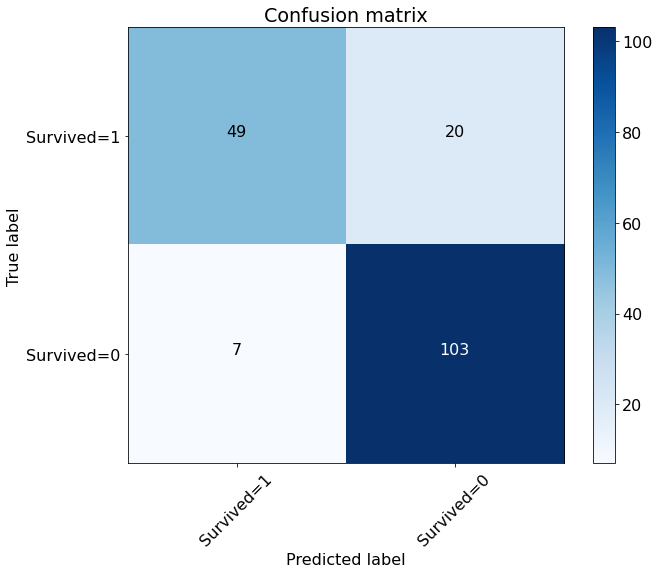

In [33]:
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_valid,preds_rfc, labels=[1,0])
np.set_printoptions(precision=2)

# Plot non-normalized confusion matrix
plt.figure(figsize=(10,8))
plt.rcParams['font.size'] = '16'
plot_confusion_matrix(cnf_matrix, classes=['Survived=1','Survived=0'],normalize= False,  title='Confusion matrix');

In [34]:
model= RandomForestClassifier(n_estimators=best_n_size, max_depth=5, random_state=1)

# Preprocessing of training data, fit model 
model.fit(oh_encoding(X_full), y)

# Preprocessing of validation data
enc_test = oh_encoding(X_test)

print(enc_test)

# Getting predictions
predictions = model.predict(enc_test)

output = pd.DataFrame({'PassengerId': titan_test.PassengerId, 'Survived': predictions})
output.to_csv('submission.csv', index=False)
print("Your submission was successfully saved!")

        Sex    LifeStage Embarked
0      male  Young Adult        S
1    female        Adult        C
2    female  Young Adult        S
3    female  Young Adult        S
4      male  Young Adult        S
..      ...          ...      ...
886    male  Young Adult        S
887  female     Teenager        S
888  female  Young Adult        S
889    male  Young Adult        C
890    male  Young Adult        Q

[891 rows x 3 columns]
     index  Pclass  SibSp  Parch     Fare  Sex_female  Sex_male  \
0        0       3      1      0   7.2500           0         1   
1        1       1      1      0  71.2833           1         0   
2        2       3      0      0   7.9250           1         0   
3        3       1      1      0  53.1000           1         0   
4        4       3      0      0   8.0500           0         1   
..     ...     ...    ...    ...      ...         ...       ...   
886    886       2      0      0  13.0000           0         1   
887    887       1      0      0